# Assignment 3: LDA Topic Modeling

## Note
Installing Tomotopy locally can return an error, if that's the case run this notebook on Google Colab

## Research Background

LDA is a popular topic modeling algorithm widely used in the fields of Digital Humanities and Social Sciences. In the field of political communication, topic modeling is often applied for analyzing politicians Twitter/X posts, identitying thematic patterns or topics revolving around their posts.

For this assignment, students will work with tweets from two USA politicians, Donald Trump and Bernie Sanders, who are often regarded as right-wing populist and left-wing populist respectively. Right-wing populism often emphasizes nationalism, anti-immigration policies, and a critique of global elites from a culturally conservative perspective, focusing on preserving traditional values and social hierarchies. Left-wing populism prioritizes economic inequality, advocating for the redistribution of wealth, expansion of social services, and empowerment of the working class against the capitalist elite. While both forms of populism appeal to the "common people" against perceived elites and established structures, they diverge significantly in their identification of the elites, proposed solutions, and core ideologies. For a more detailed explanation, you can read the chapter by Macaulay (2019) "Bernie and The Donald: A comparison of left-and right-wing populist discourse" (full reference below).

**Research Questions**
1. What topics are revolving around Donald Trump and Bernie Sanders' posts separately?
2. What are the topic differences between Trump (right-wing popoulist) and Sanders (left-wing populist)?

**Aim:**
1. The first aim of the assignment is to conduct LDA topic modeling. Identify thematic patterns or politics revolving around Trump or Sanders's posts.
2. The second aim is to critically evaluate the results of topic modeling. Try different numbers of topics to see with which settings the topics are more coherent. Critically reflect on the results of LDA topic modeling, discussing them in relation to existing theories about populism.

**Data**
Two datasets are prepared for this assginment. Tweets from Trump and tweets from Sanders. Students are asked to work on these two datasets.

**Methods**
1. Word segamentation
2. Removing stopwords
3. LDA topic modeling
4. Topic evaulation (coherence and human evaluation)
5. Visualization of results.

**References**
1. Macaulay, M. (2019). Bernie and the Donald: A comparison of Left-and Right-wing populist discourse. *Populist discourse: International perspectives*, 165-195.





## Setup

### Q1. Install necessary libraries, including `tomotopy` and `little_mallet_wrapper`, and import them

In [1]:
# Q1 (code)
import tomotopy as tp
import little_mallet_wrapper
import pandas as pd
import re
import matplotlib.pyplot as plt

## Data preprocessing

### Q2. Load the two datasets and concatenate them

The goal is to run topic modelling on the combined dataset of Sanders and Trump's tweets

In [2]:
# Q2 (code)
sanders_df = pd.read_csv('sanders_tweets.csv')
sanders_df.head()

,Username,TweetId,Title,Content
0,SenSanders,1351670845639421952,SenSanders_1351670845639421952,Wealth increase in past 10 months:\n⬆️$173 bil...
1,SenSanders,1351259762722279424,SenSanders_1351259762722279424,Amidst massive income and wealth inequality te...
2,SenSanders,1351242822293319680,SenSanders_1351242822293319680,"“We now have the resources, we now have the sk..."
3,SenSanders,1350885541911400448,SenSanders_1350885541911400448,"After surviving an attempt on his life, Russia..."
4,SenSanders,1349880150041780224,SenSanders_1349880150041780224,President-Elect Biden's COVID rescue plan will...


In [3]:
# It's good to check how many entries we have so we can check later if the cleaning was applied properly
sanders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7296 entries, 0 to 7295
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Username  7296 non-null   object
 1   TweetId   7296 non-null   int64 
 2   Title     7296 non-null   object
 3   Content   7296 non-null   object
dtypes: int64(1), object(3)
memory usage: 228.1+ KB


In [4]:
trump_df = pd.read_csv('trump_tweets.csv')
trump_df.head()

,Username,TweetId,Title,Content
0,@realDonaldTrump,822421390125043713,@realDonaldTrump_822421390125043713,It all begins today! I will see you at 11:00 ...
1,@realDonaldTrump,822501803615014918,@realDonaldTrump_822501803615014918,Today we are not merely transferring power fr...
2,@realDonaldTrump,822501939267141634,@realDonaldTrump_822501939267141634,"power from Washington, D.C. and giving it bac..."
3,@realDonaldTrump,822502135233384448,@realDonaldTrump_822502135233384448,What truly matters is not which party control...
4,@realDonaldTrump,822502270503972872,@realDonaldTrump_822502270503972872,"January 20th 2017, will be remembered as the ..."


In [5]:
# It's good to check how many entries we have so we can check later if the cleaning was applied properly
trump_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23075 entries, 0 to 23074
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Username  23075 non-null  object
 1   TweetId   23075 non-null  int64 
 2   Title     23075 non-null  object
 3   Content   23075 non-null  object
dtypes: int64(1), object(3)
memory usage: 721.2+ KB


### Q3. Clean the data

Transform all tweets to lowercase, remove stopwords, punctuation, and numbers. Add the processed text to a list called `training_data`.
Create a list with the content of the tweets (`original_texts`) and a list that allows you to identify both the author of the tweet and its ID (`titles`).


In [6]:
# Q3 (code)


training_data = []
original_texts = []
titles = []

def preprocess_text(text, title):
    processed_text = little_mallet_wrapper.process_string(text, numbers='remove', lowercase=True, remove_stop_words = True, remove_punctuation= True)
    processed_text = re.sub(r"http\S+|www\S+|https\S+|\/\/t|co\/|\@\w+|realdonaldtrump", '', processed_text, flags=re.MULTILINE) # Tip: add the following line to remove URLS and user mentions
    training_data.append(processed_text)
    original_texts.append(text)
    titles.append(title)
    

# Applying the preprocess function to the data frame, we take the content for cleaning and title for identification
trump_df.apply(lambda x: preprocess_text(x['Content'], x['Title']), axis=1)

0        None
1        None
2        None
3        None
4        None
         ... 
23070    None
23071    None
23072    None
23073    None
23074    None
Length: 23075, dtype: object

In [7]:
sanders_df.apply(lambda x: preprocess_text(x['Content'], x['Title']), axis=1)

0       None
1       None
2       None
3       None
4       None
        ... 
7291    None
7292    None
7293    None
7294    None
7295    None
Length: 7296, dtype: object

In [8]:
# Now let's check out titles list to see if both Trump and Sanders tweets are included:
# Since we have 23075 Trump tweets I will slice the list around this number
print(titles[23073:23080])

['@realDonaldTrump_1347555316863553542', '@realDonaldTrump_1347569870578266115', 'SenSanders_1351670845639421952', 'SenSanders_1351259762722279424', 'SenSanders_1351242822293319680', 'SenSanders_1350885541911400448', 'SenSanders_1349880150041780224']


In [9]:
print(training_data[23074:23076])

['asked going inauguration january', 'wealth increase past months billion elon musk billion jeff bezos billion walton family billion bill gates billion mark zuckerberg year increase minimum wage must tax rich raise minimum wage least']


As we can see, we should have successfully created a list of titles and list of the preprocessed tweets for both Trump's and Sanders' tweets!

## LDA topic modelling

### Q4. Train an LDA topic model with `tomotopy`

In [10]:
# Q4 (code)
# Number of topics to return
num_topics = 15
# Numer of topic words to print out
num_topic_words = 10

# Intialize a second model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after splitting it up into words
for tweet in training_data:
    model.add_doc(tweet.strip().split())

print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')

Topic Model Training...


Iteration: 0	Log-likelihood: -9.747255611239142
Iteration: 10	Log-likelihood: -9.334030317813982
Iteration: 20	Log-likelihood: -9.14027208303759
Iteration: 30	Log-likelihood: -9.039895001343979
Iteration: 40	Log-likelihood: -8.97644764412332
Iteration: 50	Log-likelihood: -8.931526612059054
Iteration: 60	Log-likelihood: -8.900795471396801
Iteration: 70	Log-likelihood: -8.877835803691402
Iteration: 80	Log-likelihood: -8.861150941936629
Iteration: 90	Log-likelihood: -8.8468437177207


In [12]:
# I saved a model I created because I had to rerun the notebook and my initial interpretation of topics became void
# Therefore I will use a model I saved again to avoid having to rework the notebook when reloading
# This model will also be uploaded

# model.save('15topic_LDA_model.bin')

## Q5. Print out the top words for each topic and manually evaluate their coherence


In [11]:
# Loading in model I created before
model = tp.LDAModel.load('15topic_LDA_model.bin')

In [12]:
# Q5a (code)
print("\nTopic Model Results:\n\n")

topics = []
topic_individual_words = []
for topic_number in range(0, num_topics):
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    topics.append(topic_words)
    topic_individual_words.append(topic_words.split())
    print(f"✨Topic {topic_number}✨\n\n{topic_words}\n")


Topic Model Results:


✨Topic 0✨

people must country working american congress bill get need public

✨Topic 1✨

every country wage people women america american world today americans

✨Topic 2✨

war united people states president iran trump must today god

✨Topic 3✨

trump president news live sanders watch donald potus via says

✨Topic 4✨

great thank president today whitehouse america honor day house white

✨Topic 5✨

workers paid covid coronavirus must federal need states pay leave

✨Topic 6✨

border wall security law police immigration federal must illegal mexico

✨Topic 7✨

change climate energy must people fossil puerto rico planet stand

✨Topic 8✨

great vote total endorsement state strong military complete amendment job

✨Topic 9✨

biden trump joe election foxnews president thank tonight sleepy fraud

✨Topic 10✨

china jobs years trade economy great ever president country year

✨Topic 11✨

health care tax people americans million trump billion drug medicare

✨Topic 12✨

democr

### Topic descriptions:

In [ ]:
# Q5b (words)
# Describe what each topic is about. What ideas, values, or situations do these keywords refer to?

#### Topic 0
people must country working american congress bill get need public

This topic seems to be about passing legislation in regards to work and public interest in this.

#### Topic 1
every country wage people women america american world today americans

This topic could be about the wage and perhaps particularly in regards to American women.

#### Topic 2
war united people states president iran trump must today god

This topic seems to be about the difficult relations the U.S.has with Iran. While there isn't an overt war with the country, the relations are certainly strained. 

#### Topic 3
trump president news live sanders watch donald potus via says

Personally, this topic seems to be elusive. It could be about watching news and perhaps the inauguration of Trump as president.

#### Topic 4
great thank president today whitehouse america honor day house white

This topic seems to caputure tweets that are in regards to statements or speeches given at the White House.

#### Topic 5
workers paid covid coronavirus must federal need states pay leave

This topic is related to the pandemic and also the strained economy. A glace at the US Department of  Labor  reveals that indeed workers can be entitled to paid sick leave. It seems this topic caputures discourse on this.

#### Topic 6
border wall security law police immigration federal must illegal mexico

This topic is a classical security topic of Trump. In his run-up to the 2016 election the idea of builiding a wall to Mexico was important to his election and a trademark of his anti-immigration policy.

#### Topic 7
change climate energy must people fossil puerto rico planet stand

This topic is about climate change and about the energy transition from fossil fuels. The reason for Puerto Rico to be included could be because in a 2019 report by Germanwatch, Puerto Rico was labelled as one of the most affected places by climate change.

#### Topic 8
great vote total endorsement state strong military complete amendment job

This topic seems to be related to electorial matters and in particular how the endorsement and vote is strong. It reflects classic populist themes as populists often claim to speak on behalf of the people. Words such as 'great', 'total', 'endorsement' and 'complete' help establish these populist undertones.

#### Topic 9
biden trump joe election foxnews president thank tonight sleepy fraud

This topic could be about reporting on elections. Presumably, it could be that Trump is trying to discredit Joe Biden.
Notably is the word 'sleepy' as Trump popularized the nickname 'Sleepy Joe' in the run-up to the 2020 presidental elections.

#### Topic 10
china jobs years trade economy great ever president country year

Topic 10 is about the economic conflict between the US and China. In 2018 when Trump was in office as president he began setting tarifs and other trade barriers, it is likely that the tweets are about this curtailing.

#### Topic 11
health care tax people americans million trump billion drug medicare

This topic is related to health care issues, and perhaps Trump argues how it costs the American people a lot of money to pay for the Affordable Care Act. Conversely, this topic could also be of importance to the democrats

#### Topic 12
democrats want president people house republicans court senate impeachment party

Topic 12 seems to be about issues regarding the debate on impeaching Trump.

#### Topic 13
trump fbi president russia collusion witch hunt mueller schiff democrats

Topic 13 is very strong and relates to Russian collusion allegations of Trump's election campaign in 2016. The Mueller report is a central document in this process and Trump keeps referring to these allegations as a 'witch hunt'.

#### Topic 14
news fake media people even would many never like bad

The last topic is about fake news and the media. Trump often discredited the media and well-known media channels for twisting the narratives. 

## Topic coherence

Use `tomotopy`'s [`.coherence()`](https://bab2min.github.io/tomotopy/v0.10.0/en/coherence.html) function to automatically calculate the topic coherence.

The coherence value can vary from `0` (no coherence) to `1` (maximum coherence). Interpret the results and, if needed, retrain the model using a different number of topics.

## Evaluating coherence

In [15]:
# There are different metrics for coherence, we choose `c_v`

coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()

==== Coherence : c_v ====
Average: 0.5853479865193367 
Per Topic: [0.521556681394577, 0.5386198043823243, 0.4624039813876152, 0.5575379461050034, 0.5788436949253082, 0.5730936676263809, 0.5953321069478988, 0.6802988141775131, 0.7420872390270233, 0.5657411187887191, 0.49886719733476637, 0.6156003825366497, 0.5191901035606861, 0.7276621848344803, 0.6033848747611046]



### Retraining the model 

In [16]:
# Number of topics to return
num_topics = 10
# Numer of topic words to print out
num_topic_words = 8

# Intialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after splitting it up into words
for tweet in training_data:
    model.add_doc(tweet.strip().split())

print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')

Topic Model Training...


Iteration: 0	Log-likelihood: -9.553172370344516
Iteration: 10	Log-likelihood: -9.201442814503585
Iteration: 20	Log-likelihood: -9.040661835678714
Iteration: 30	Log-likelihood: -8.964921348512991
Iteration: 40	Log-likelihood: -8.919911278746794
Iteration: 50	Log-likelihood: -8.885511473398363
Iteration: 60	Log-likelihood: -8.863617218046492
Iteration: 70	Log-likelihood: -8.847492538456617
Iteration: 80	Log-likelihood: -8.832146277271633
Iteration: 90	Log-likelihood: -8.821667549014354


In [17]:
coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()

==== Coherence : c_v ====
Average: 0.5269427470490335 
Per Topic: [0.5204754456877708, 0.5502877339720726, 0.47616619020700457, 0.5754460513591766, 0.4662236154079437, 0.5041675612330436, 0.5421795915812254, 0.46547318398952486, 0.6107301145792008, 0.5582779824733735]



### Q6. Interpret topic coherence

Report the following:
- number of topics you initially used to train the model and the coherence score you got
- changes made to the number of topics and new coherence scores obtained

In [ ]:
# Q6 (words)

The initial coherence average of 0.58 does not seem bad for a first try. For this the model was initialized with 15 topics. I then tried to reduce the topic sizes as some topics seem to not give us a lot of information and also have rather low c_v scores, such as topic 2 (0.462) on `war united people states president iran trump must today god`.

The new model was then trained on 10 topics.

This decreased the metrics to of a c_v of 0.52, which means that having less topics does not necessarily mean better coherence results. This suggest that a wide variety of topics may be present in the dataset and requires more coherence testing slighlty below the original amount of topic and perhaps above as well. 

### X1. Optional question 1
(This question is not compulsory, it only allows you to get an extra point.)

Create a function to plot the average coherence for models with different number of topics.

In [18]:
# X1 (code)
# Tip: y = average topic coherence; x = number of topics in the model


# range of topics range(4:19)
# return the amount of topics trained and the average coherence for the model

def model_adjusting(training_data, amount):
    coherences =[]
    for num in amount:
        
        # Intialize the model with the topics
        model = tp.LDAModel(k=num)
        
        # Add each document to the model, after splitting it up into words
        for tweet in training_data:
            model.add_doc(tweet.strip().split())
            
        # Train the model   
        iterations = 10
        for i in range(0, 100, iterations):
            model.train(iterations)
            
        # Get coherence
        coh = tp.coherence.Coherence(model, coherence='c_v')
        average_coherence = coh.get_score()
        coherences.append(average_coherence)

        # Print coherence resuls
        print('\n==== Coherence : {} ===='.format('c_v'))
        print('Average:', average_coherence, '\nAmount of Topics:', num)
        
    # Plot results
    
    plt.plot(amount, coherences)


==== Coherence : c_v ====
Average: 0.5261019315038409 
Amount of Topics: 7

==== Coherence : c_v ====
Average: 0.5899497613310813 
Amount of Topics: 8

==== Coherence : c_v ====
Average: 0.5445605135626264 
Amount of Topics: 9

==== Coherence : c_v ====
Average: 0.5656150397658347 
Amount of Topics: 10

==== Coherence : c_v ====
Average: 0.5750243995677341 
Amount of Topics: 11

==== Coherence : c_v ====
Average: 0.5547885765631994 
Amount of Topics: 12

==== Coherence : c_v ====
Average: 0.5672623159220586 
Amount of Topics: 13

==== Coherence : c_v ====
Average: 0.5680810071527957 
Amount of Topics: 14

==== Coherence : c_v ====
Average: 0.5902428909142812 
Amount of Topics: 15

==== Coherence : c_v ====
Average: 0.5703324227128177 
Amount of Topics: 16

==== Coherence : c_v ====
Average: 0.5913772780776899 
Amount of Topics: 17

==== Coherence : c_v ====
Average: 0.5687813279943335 
Amount of Topics: 18

==== Coherence : c_v ====
Average: 0.5902998139591594 
Amount of Topics: 19


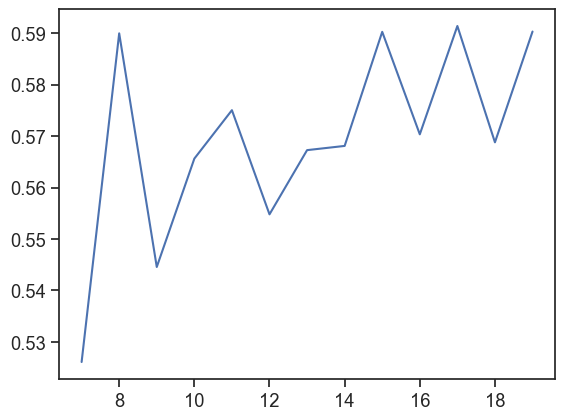

In [19]:
model_adjusting(training_data, range(7,20))

As we can see, indeed it seems that the average coherence is consistently higher for the models trained on more topics (15 and above).
However, there is a bit of an outlier with the model trained using 8 models having a similar coherence as those trained using more topics.

### Q7. Topic distributions
Calculate the topic distributions for all tweets and get the top documents for some topics (between 2 and 5) that you think could be more representative of Sanders or Trump.

In [16]:
# Q7a (code)

# Loading in model I created before so we still talk about the same topics, which were already interpreted
model = tp.LDAModel.load('15topic_LDA_model.bin')

topic_distributions = [list(doc.get_topic_dist()) for doc in model.docs]

In [29]:
topic_distributions[60] # looking at the 60th tweet in our dataset

[0.009321153,
 0.16299394,
 0.007874234,
 0.006663947,
 0.01136346,
 0.008455225,
 0.16395403,
 0.0053460444,
 0.0071885297,
 0.009128265,
 0.09008082,
 0.009896084,
 0.012440139,
 0.08816319,
 0.4071309]

We now have all the topic distributions for all individuals tweets in our dataset.

Let's look at some tweets from selected topics

In [29]:
from IPython.display import Markdown, display

def make_md(string):
    display(Markdown(str(string)))
    
def get_top_docs(docs, title, topic_distributions, topic_index, n=5):

    sorted_data = sorted([(_distribution[topic_index], _document, _title)
                          for _distribution, _document, _title
                          in zip(topic_distributions, docs, title)], reverse=True)

    topic_words = topics[topic_index]

    make_md(f"### ✨Topic {topic_index}✨\n\n{topic_words}\n\n ---")

    for probability, doc, title in sorted_data[:n]:
        # Make topic words bolded
        for word in topic_words.split():
            if word in doc.lower():
                doc = re.sub(f"\\b{word}\\b", f"**{word}**", doc, re.IGNORECASE)

        make_md(f'**Topic Probability**: {probability}\n\n**Tweet**: {title} \n\n**Document**: {doc}\n\n\n ---')

    return

In [30]:
get_top_docs(original_texts, titles, topic_distributions, topic_index=13, n=5)

### ✨Topic 13✨

trump fbi president russia collusion witch hunt mueller schiff democrats

 ---

**Topic Probability**: 0.9412517547607422

**Tweet**: @realDonaldTrump_1067494680416407552 

**Document**:  Very disappointed with General Motors and their CEO, Mary Barra, for closing plants in Ohio, Michigan and Maryland. Nothing being closed in Mexico &amp; China. The U.S. saved General Motors, and this is the THANKS we get! We are now looking at cutting all @GM subsidies, including....


 ---

**Topic Probability**: 0.9368714690208435

**Tweet**: @realDonaldTrump_944665687292817415 

**Document**:  How can FBI Deputy Director Andrew McCabe, the man in charge, along with leakin’ James Comey, of the Phony Hillary Clinton investigation (including her 33,000 illegally deleted emails) be given $700,000 for wife’s campaign by Clinton Puppets during investigation?


 ---

**Topic Probability**: 0.9344269037246704

**Tweet**: @realDonaldTrump_1026471244949061632 

**Document**:  “Collusion with Russia was very real. Hillary Clinton and her team 100% colluded with the Russians, and so did Adam Schiff who is on tape trying to collude with what he thought was Russians to obtain compromising material on DJT. We also know that Hillary Clinton paid through....


 ---

**Topic Probability**: 0.9344269037246704

**Tweet**: @realDonaldTrump_1023664624259014656 

**Document**:  ....Also, why is Mueller only appointing Angry Dems, some of whom have worked for Crooked Hillary, others, including himself, have worked for Obama....And why isn’t Mueller looking at all of the criminal activity &amp; real Russian Collusion on the Democrats side-Podesta, Dossier?


 ---

**Topic Probability**: 0.9317853450775146

**Tweet**: @realDonaldTrump_975163071361683456 

**Document**:  The Mueller probe should never have been started in that there was no **collusion** and there was no crime. It was based on fraudulent activities and a Fake Dossier paid for by Crooked Hillary and the DNC, and improperly used in FISA COURT for surveillance of my campaign. WITCH HUNT!


 ---

In [32]:
get_top_docs(original_texts, titles, topic_distributions, topic_index=7, n=10)

### ✨Topic 7✨

change climate energy must people fossil puerto rico planet stand

 ---

**Topic Probability**: 0.9195653796195984

**Tweet**: SenSanders_960927843516633088 

**Document**: Our job is to remind Trump and his allies what democracy is all about. By our grassroots activism we will defend President Lincoln's words “that government of the **people**, by the **people**, for the people, shall not perish from the Earth."


 ---

**Topic Probability**: 0.9044058322906494

**Tweet**: SenSanders_1094963015386943488 

**Document**: 75 years ago, FDR talked about the need to guarantee every person in this country a good job as a fundamental right. That was true in 1944. It is true today.


 ---

**Topic Probability**: 0.897278368473053

**Tweet**: SenSanders_1022933658309718016 

**Document**: What a hypocrite! Given the choice between hiring American workers at a living wage or hiring much less expensive workers from China that he can exploit, Donald Trump opts for the low-wage overseas labor day in and day out. https://t.co/5UXIvEmYar


 ---

**Topic Probability**: 0.8956606388092041

**Tweet**: SenSanders_748910204830429184 

**Document**: I'm proud of the grassroots activism that led to this law and the support the legislature and @GovPeterShumlin gave. https://t.co/fay9ebqQKI


 ---

**Topic Probability**: 0.8890668749809265

**Tweet**: SenSanders_740205529012838400 

**Document**: With rampant violence and murder all over the world, America **must** say clearly that we won’t contribute. We **must** abolish the death penalty.


 ---

**Topic Probability**: 0.8890668749809265

**Tweet**: SenSanders_990712052267257856 

**Document**: We are finally beginning to see some major victories in reforming our broken criminal justice system which has destroyed so many lives. https://t.co/aiWqDYpzI1


 ---

**Topic Probability**: 0.8890668749809265

**Tweet**: SenSanders_697951576263159808 

**Document**: The opioid epidemic claims 78 lives each day. We **must** ensure lifesaving drugs, such as naloxone, are accessible to those who need them.


 ---

**Topic Probability**: 0.8890668749809265

**Tweet**: SenSanders_734778890959216640 

**Document**: I just don't think human life is about making billions and billions of dollars and ignoring the reality around me.
https://t.co/irkHPCOJ8d


 ---

**Topic Probability**: 0.8815835118293762

**Tweet**: SenSanders_897513079579312128 

**Document**: We **must** vigorously #DefendDACA and the young **people** in that program. We cannot be sweeping up millions and throwing them out of the country.


 ---

**Topic Probability**: 0.8815835118293762

**Tweet**: SenSanders_707273290109337600 

**Document**: Want to intern for Sen. Bernie Sanders this summer? Get your application in before March 18. Apply here: https://t.co/RSKlzhaMT3


 ---

Interpret the results above. Are there topics that have top tweets only by one politician? Why do you think these topics are more representative of one of the two politicians' views?

In [ ]:
# Q7b (words)

For this exercise I repurposed a function from week 6 lab but added the tweet's title as well so we can identify who wrote it. I decided on two topics since I felt like they could lean more into a particularly politican, which ended up being correct. 

Topic 13 `trump fbi president russia collusion witch hunt mueller schiff democrats` has a c_v of 0.72, which is rather high and is representative of a strong topic of Trump's. Seeing the top five tweets, it is obvious that in these tweets Trump is trying to downplay allegations of the 2016 election results being influenced by  collusion with Russia and actively discredits the Mueller reports. Even more so, Trump implies that the democrats colluded with Russia as he drags Hillary Clinton and other officials/politicans through the mud.

Topic 7 `change climate energy must people fossil puerto rico planet stand` seemed straightforward in the subject of the topic but looking at the top tweets, we see that the meaning of them and the coherence of the topic is much more elusive. I epxected this topic to be mainly tweeted about by Sanders as democrats are more concerned with climate change and changing energy policy. However, even after inspecting more tweets than with the previous topic, we can see that the tweets are about very different issues such as the opiod epidemic and abolishing the death penalty.

## Large scale analysis

### Q8. Create a random sample of the whole dataset and visualize the topic distributions for the sampled tweets

In [35]:
# Create a sample of tweets

from random import sample

target_labels = sample(titles,100)

In [33]:
# Q8 (code)
# Create a heatmap using the random sample
# Tip: to display more than 20 tweets you have to change the values of `dim =` in sns.heatmap()

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='ticks', font_scale=1.2)
def plot_categories_by_topics_heatmap(labels,
                                      topic_distributions,
                                      topic_keys,
                                      output_path=None,
                                      target_labels=None,
                                      color_map = sns.cm.rocket_r,
                                      dim=None):

    # Combine the labels and distributions into a list of dictionaries.
    dicts_to_plot = []
    for _label, _distribution in zip(labels, topic_distributions):
        if not target_labels or _label in target_labels:
            for _topic_index, _probability in enumerate(_distribution):
                dicts_to_plot.append({'Probability': float(_probability),
                                      'Tweet': _label,
                                      'Topic': 'Topic ' + str(_topic_index).zfill(2) + ': ' + ' '.join(topic_keys[_topic_index][:5])})

    # Create a dataframe, format it for the heatmap function, and normalize the columns.
    df_to_plot = pd.DataFrame(dicts_to_plot)
    df_wide = df_to_plot.pivot_table(index='Tweet',
                                     columns='Topic',
                                     values='Probability')
    df_norm_col=(df_wide-df_wide.mean())/df_wide.std()

    # Show the final plot.
    if dim:
        plt.figure(figsize=dim)
    sns.set(style='ticks', font_scale=1.2)
    ax = sns.heatmap(df_norm_col, cmap=color_map)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    plt.xticks(rotation=30, ha='left')
    plt.tight_layout()
    plt.show()

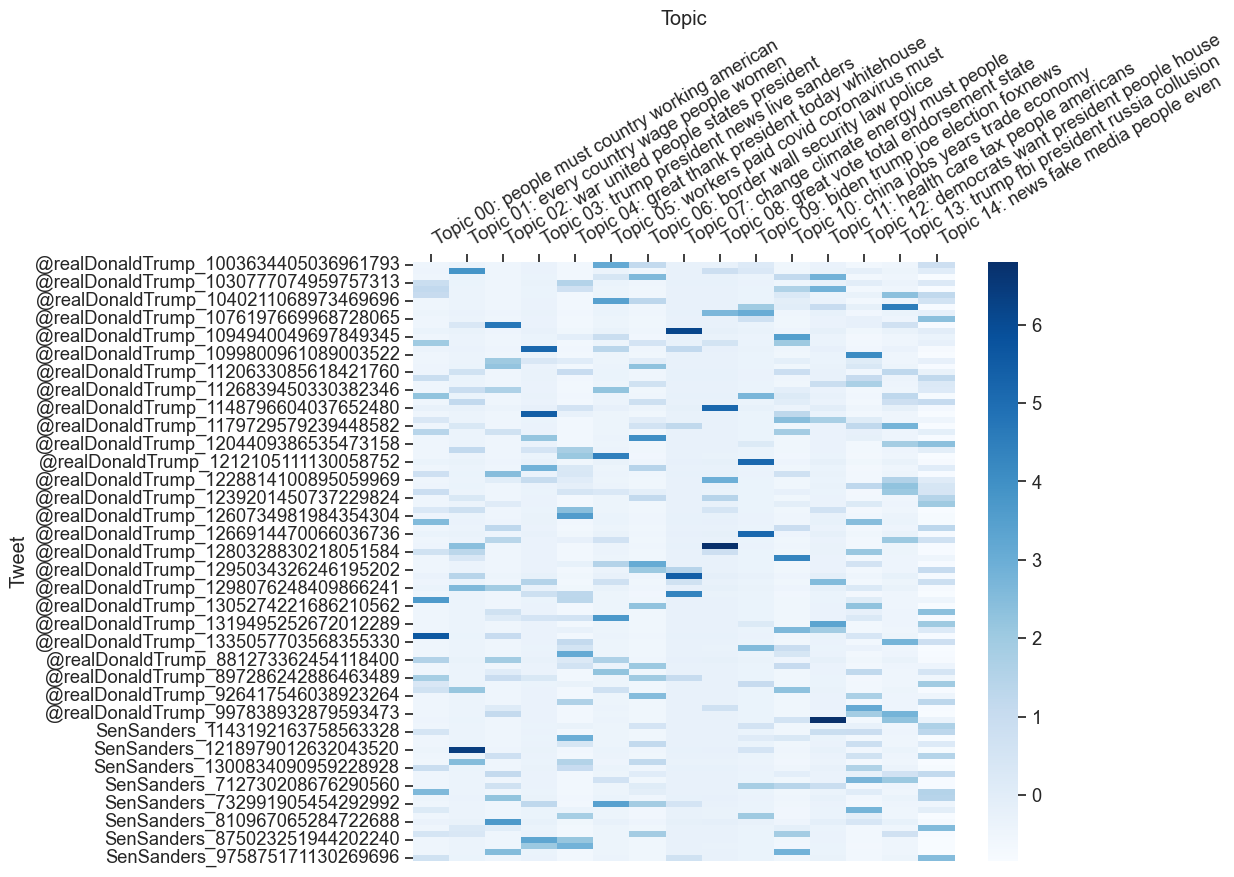

In [36]:
plot_categories_by_topics_heatmap(target_labels,
                                  topic_distributions,
                                  topic_individual_words,
                                  target_labels=target_labels,
                                  color_map = 'Blues',
                                 dim=(12,9))

### Q9. Interpret the heatmap
Do you see any pattern in the probability distributions of topics for each politician?

Are there topics that are more likely for one of the two politicians?

In [ ]:
# Q9 (words)

In my opinion, the heatmap does not provide a clear distribution of topics for each politican. Surprisingly, we can see that there are a few Trump tweets assosciated strongly with Topic 7, which top tweets are all by Sanders as we saw in the topic exploration before. Additionally, we can see that the sample is rather skewed and there are much more Trump tweets in the heatmap as compared to Sanders tweets, which is to be expected as our data set contains much more tweets of Trump, an avid tweeter, than Sanders.

### X2. Optional question 2
(This question is not compulsory, it only allows you to get an extra point)

Make the sample balanced, with 50 tweets by Trump and 50 by Sanders.

In [47]:
# X2 (code)

Sanders_titles =[]
Trump_titles = []

for title in titles:
    if 'SenSanders' in title:
        Sanders_titles.append(title)
    else:
        Trump_titles.append(title)
        
balanced_target_labels = sample(Sanders_titles,50) + (sample(Trump_titles,50))

balanced_target_labels[49:51] #checking if we have created a list with balanced samples

['SenSanders_713858102551035904', '@realDonaldTrump_1181232251390042118']

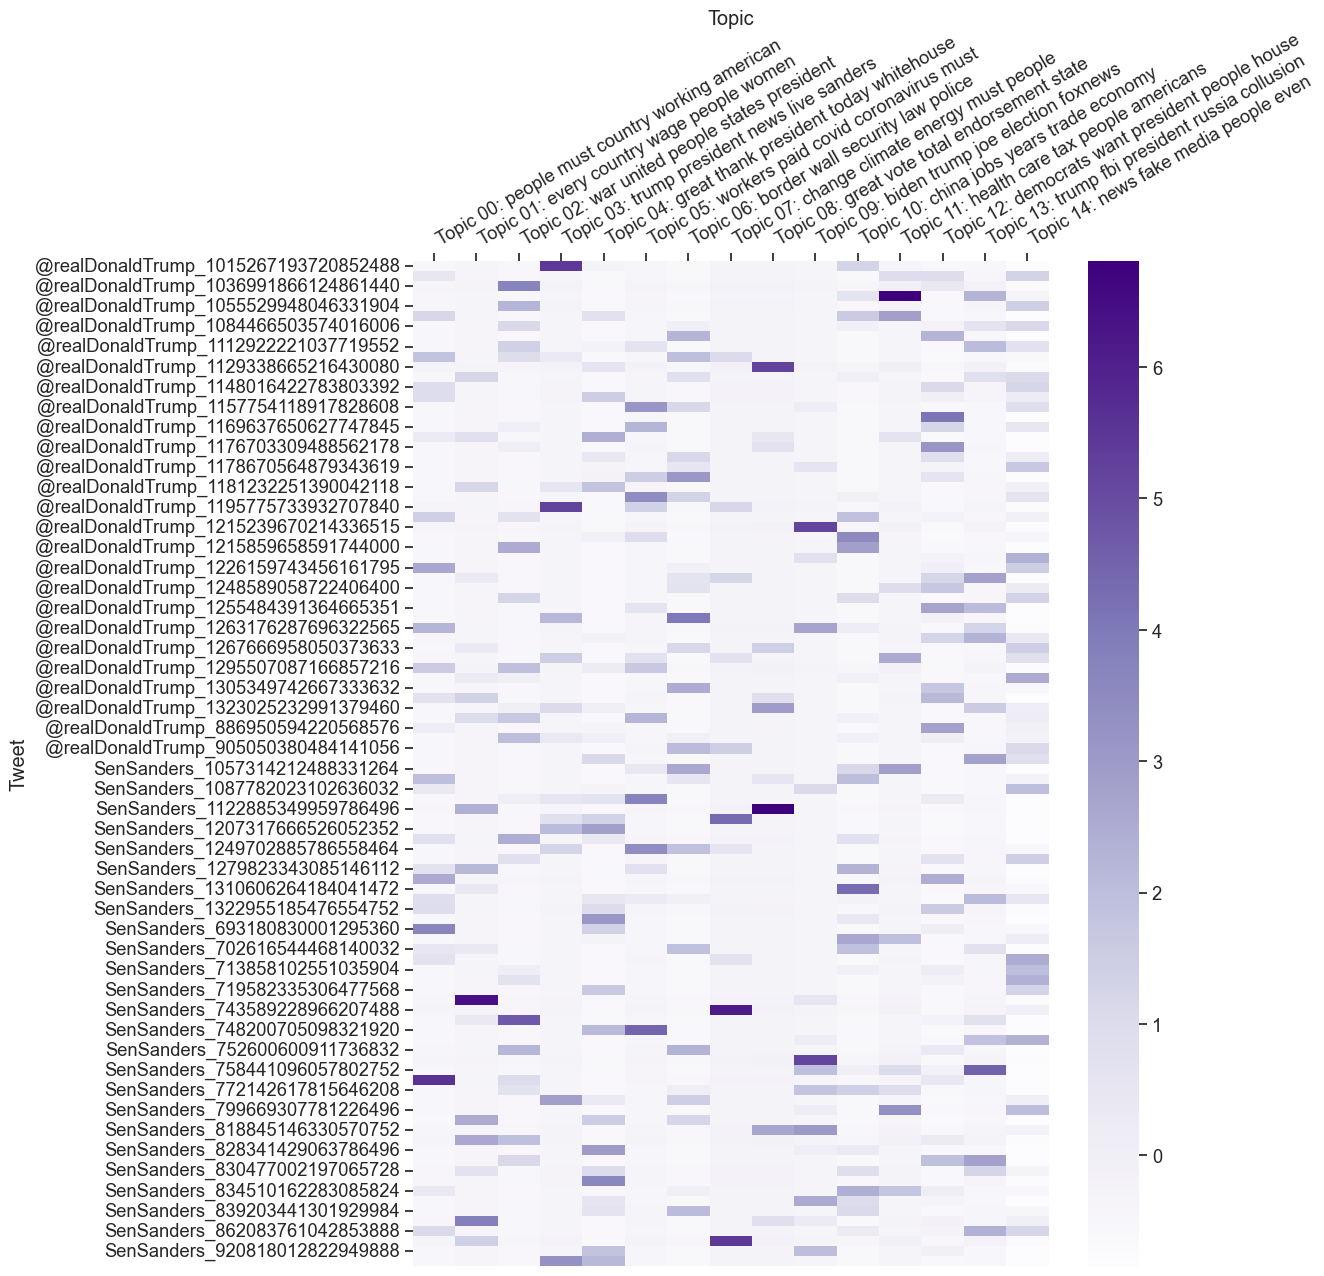

In [54]:
plot_categories_by_topics_heatmap(balanced_target_labels,
                                  topic_distributions,
                                  topic_individual_words,
                                  target_labels=balanced_target_labels,
                                  color_map = 'Purples',
                                 dim=(13,13))

### X3. Optional question 3
(This question is not compulsory, it only allows you to get an extra point)

Extend the analysis to all the tweets in the dataset.

In [ ]:
# X3 (code and words)
# Tip: plotting a heatmap for thousands of tweets is not practical.
# Make a comparison based on the numerical values in the `df_norm_col` dataframe (see Week 6 notebook)